# Hash Tables

## Creating an MD5 Hash Function

To create an MD5 hash function, we can use the `hashlib` module in Python. The `hashlib` module provides a simple interface to securely hash data using various algorithms, including MD5. Below is an example of how to create and use an MD5 hash function.

In [178]:
import hashlib

def md5(input_string):

    return hashlib.md5(input_string.encode('utf-8')).hexdigest()

In [179]:
# Hash functions have O(1) complexity
# it's constant time

print(md5('grapes'))
print(md5('apples'))
print(md5('oranges'))

15a8de26589689d0fa41acee04d25b8a
daeccf0ad3c1fc8c8015205c332f5b42
91b07b3169d8a7cb6de940142187c8df


```
Insert: O(1)
Lookup: O(1)
Delete: O(1)
Search: O(1)

Dictionaries = Hash Tables in Python

In [180]:
user = {
    'age': 54,
    'name': "John",
    'magic': True,
    'scream': lambda: print("AHHHH!"),
    'age_in_10_years': lambda: user['age'] + 10
}

# To call the function:
user['scream']()
user['age_in_10_years']()

AHHHH!


64

Problem with Hash Tables: Collision

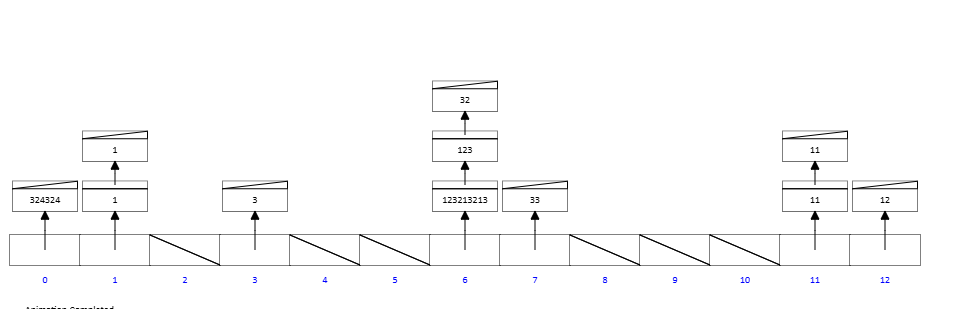

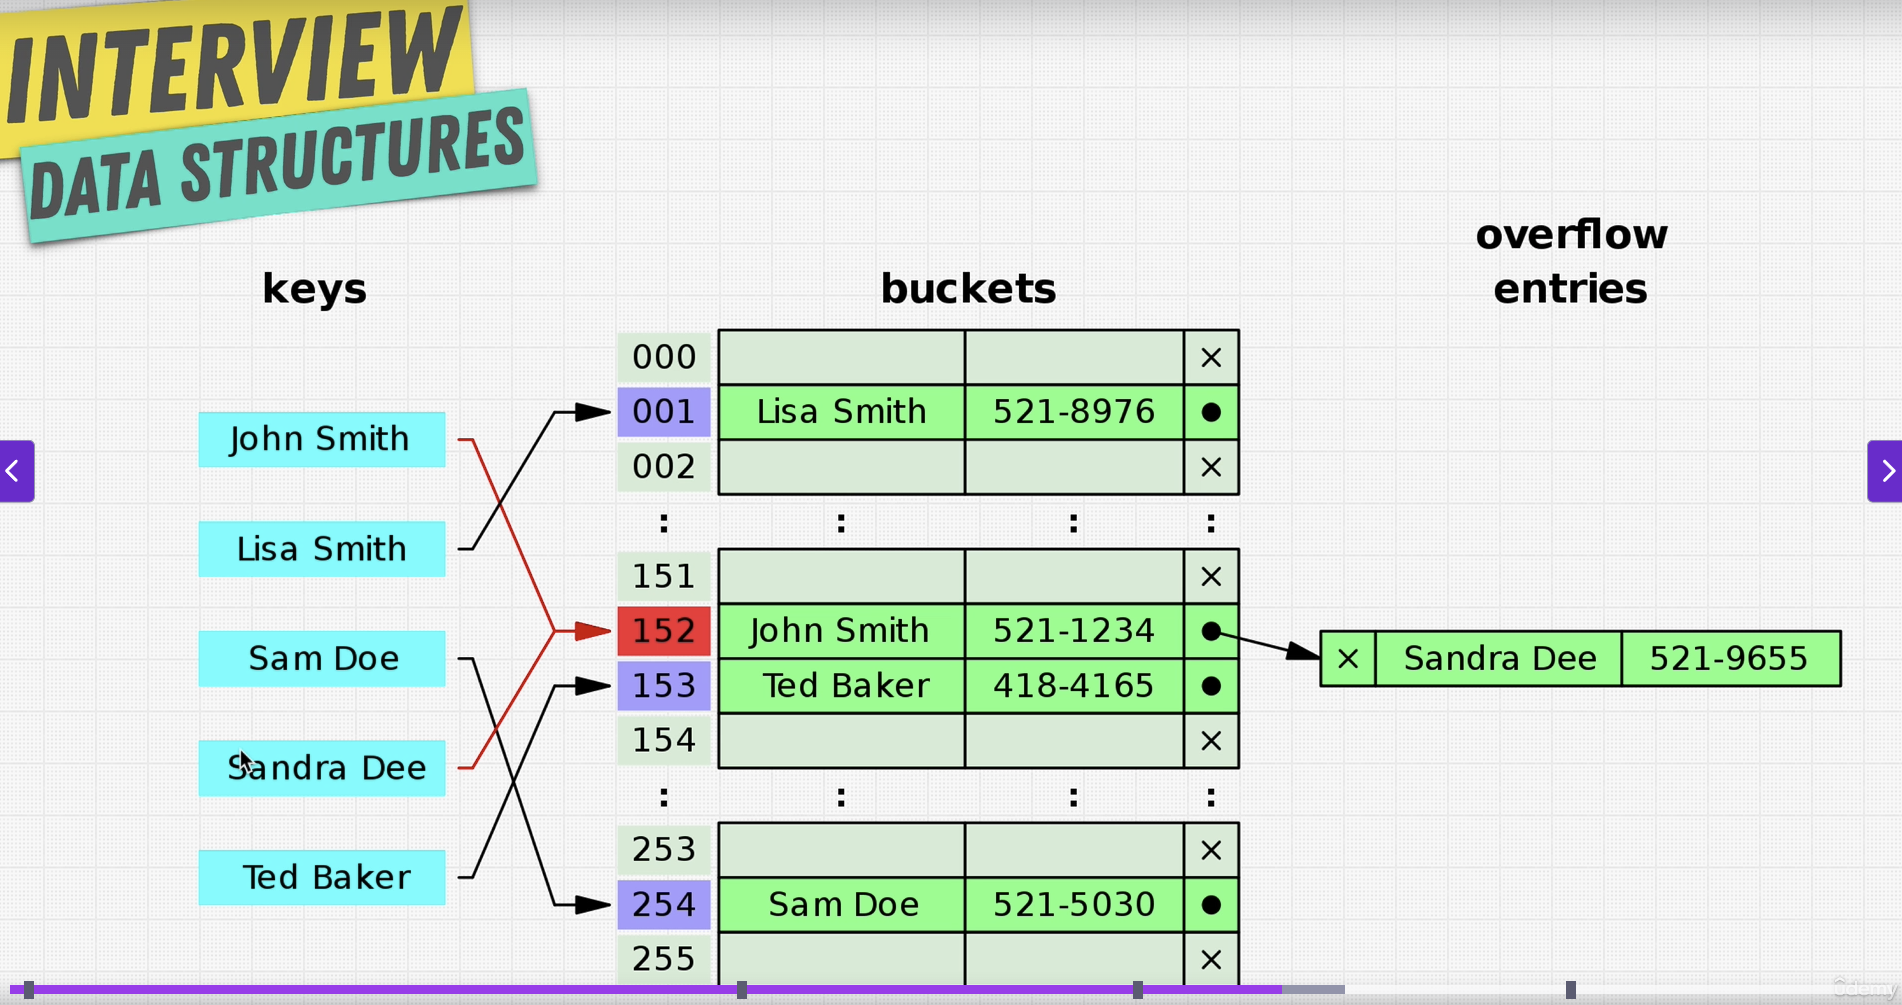

With enough data, you're eventually going to have a collision.

In [181]:
# Equivalent of Maps in Python
my_map = {
    'key1': 'value1',
    'key2': 'value2',
    'key3': 'value3'
}
print(my_map['key1'])  # Access value by key

# Equivalent of Sets in Python
my_set = {'value1', 'value2', 'value3'}
print('value1' in my_set)  # Check if an element exists in the set

value1
True


#### EXERCISE: Implement a Hash Table

In [182]:
def log_hash(func):
    def wrapper(self, key):
        result = func(self, key)
        print(f"HASH: '{key}': {result}")
        return result  # Ensure the result is returned
    return wrapper

In [183]:
class HashTable():
    def __init__(self, size=10):
        # O(1) - Initializing the hash table with a fixed size and empty slots
        self.size = size
        self.data = [None] * size  # Initialize the data array with None values

    @log_hash
    def _hash(self, key):
        # O(n) - Hashing the key involves iterating through all characters in the key
        hash = 0
        for i in range(len(key)):
            hash = (hash + ord(key[i]) * i) % self.size  # Use ord() to get ASCII value of the character
        return hash
    
    def set(self, key, value):
        # O(1) on average - Adding a key-value pair involves calculating the hash and appending to the bucket
        # O(n) in the worst case - If there are many collisions, iterating through the bucket may take longer
        address = self._hash(key)
        if not self.data[address]:
            self.data[address] = []
        self.data[address].append((key, value))

    def get(self, key):
        # O(1) on average - Retrieving a value involves calculating the hash and accessing the bucket
        # O(n) in the worst case - If there are many collisions, iterating through the bucket may take longer
        address = self._hash(key)
        current_bucket = self.data[address]
        for pair_key, pair_value in current_bucket:
            if pair_key == key:
                return pair_value
            
    def keys(self):
        """
        Retrieve all keys stored in the hash table.

        Time Complexity:
        - O(n): Iterates through all buckets in the hash table.
        - O(k): For each bucket, iterates through the items (k is the total number of items in the hash table).
        Overall: O(n + k), where n is the number of buckets and k is the total number of items.

        Returns:
        - A list of all keys in the hash table.
        """
        key_list = []

        def extract_keys_from_tuples_in_list(bucket):
            """
            Helper function to extract keys from a bucket.

            Time Complexity:
            - O(m): Iterates through all items in the bucket (m is the number of items in the bucket).
            """
            for item in bucket:
                if isinstance(item, tuple):  # If the item is a tuple, add the key to the key_list
                    key_list.append(item[0])
                elif isinstance(item, list):  # If the item is a nested list, recursively extract keys
                    extract_keys_from_tuples_in_list(item)

        for bucket in self.data:
            if bucket:  # Only process non-empty buckets
                extract_keys_from_tuples_in_list(bucket)

        return key_list
    
    def __repr__(self):
        # O(n) - Representing the hash table involves iterating through all buckets
        return str(self.data)

In [184]:
myHashTable = HashTable(4)
myHashTable.set('grapes', 5000)
myHashTable.set('apples', 999)
myHashTable.set('pears', 25)
myHashTable.set('cats', 100)
myHashTable.set('dogs', 200)
myHashTable.set('dogs1', 200)
myHashTable.set('dogs2', 200)
myHashTable.set('dogs3', 200)
myHashTable.set('dogs4', 200)


HASH: 'grapes': 3
HASH: 'apples': 3
HASH: 'pears': 1
HASH: 'cats': 2
HASH: 'dogs': 2
HASH: 'dogs1': 2
HASH: 'dogs2': 2
HASH: 'dogs3': 2
HASH: 'dogs4': 2


In [185]:
myHashTable

[None, [('pears', 25)], [('cats', 100), ('dogs', 200), ('dogs1', 200), ('dogs2', 200), ('dogs3', 200), ('dogs4', 200)], [('grapes', 5000), ('apples', 999)]]

In [186]:
myHashTable.get('cats')

HASH: 'cats': 2


100

In [187]:
myHashTable.get('dogs')

HASH: 'dogs': 2


200

In [188]:
myHashTable

[None, [('pears', 25)], [('cats', 100), ('dogs', 200), ('dogs1', 200), ('dogs2', 200), ('dogs3', 200), ('dogs4', 200)], [('grapes', 5000), ('apples', 999)]]

In [189]:
myHashTable.keys()

['pears',
 'cats',
 'dogs',
 'dogs1',
 'dogs2',
 'dogs3',
 'dogs4',
 'grapes',
 'apples']

#### EXERCISE: First Recurring Character
(from Google)

Find the first recurring character in an array. A recurring character is the first element that appears more than once when traversing the array from left to right. If no such element exists, return `undefined`.

```python
# Given the array [2, 5, 1, 2, 3, 5, 1, 2, 4]
# Returns 2

# Given the array [2, 1, 1, 2, 3, 5, 1, 2, 4]
# Returns 1

# Given the array [2, 3, 4, 5]
# Returns undefined
```

My first solution, instinctive

In [190]:
def first_double(array):
    """
    Find the first recurring character in an array.

    Time Complexity:
    - O(n^2) in the worst case: If the `in` operator is used on a list, it has O(n) complexity, 
      and since it is inside a loop, the overall complexity becomes O(n^2).
    - O(n) on average: If the list `searched` remains small, the average complexity is linear.

    Space Complexity:
    - O(n): The `searched` list grows linearly with the size of the input array in the worst case.
    """
    searched = list()

    for item in array:  # O(n)
        if item in searched:  # O(n) for the `in` operator on a list
            return item
        else:
            searched.append(item)  # O(1) for appending to a list

    return 'undefined'


array1 = [2, 5, 1, 2, 3, 5, 1, 2, 4]
array2 = [2, 1, 1, 2, 3, 5, 1, 2, 4]
array3 = [2, 3, 4, 5]

print(first_double(array1))  # O(n^2) in the worst case
print(first_double(array2))  # O(n^2) in the worst case
print(first_double(array3))  # O(n^2) in the worst case

2
1
undefined


Optimized with SET

In [191]:
def first_double_optimized(array):
    """
    Find the first recurring character in an array.

    Time Complexity:
    - O(n): Iterates through the array once, and set operations (add and lookup) are O(1) on average.

    Space Complexity:
    - O(n): The `seen` set grows linearly with the size of the input array in the worst case.
    """
    seen = set()

    for item in array:  # O(n)
        if item in seen:  # O(1) for set lookup
            return item
        seen.add(item)  # O(1) for adding to a set

    return 'undefined'


# Test cases
print(first_double_optimized(array1))  # O(n)
print(first_double_optimized(array2))  # O(n)
print(first_double_optimized(array3))  # O(n)

2
1
undefined


Instructor's Naive Approach

In [ ]:
def first_recurring_character(input):
    """
    Find the first recurring character in an array.

    Time Complexity:
    - O(n^2): The nested loops result in a quadratic time complexity, as for each element in the outer loop, 
      the inner loop iterates through all elements.

    Space Complexity:
    - O(1): No additional data structures are used, so the space complexity is constant.
    """
    for i in input:  # O(n)
        for j in input:  # O(n)
            if i == j:  # O(1)
                return i
            
    return 'undefined'

# Test cases
array1 = [2, 5, 1, 2, 3, 5, 1, 2, 4]
array2 = [2, 1, 1, 2, 3, 5, 1, 2, 4]
array3 = [2, 3, 4, 5]

print(first_double_optimized(array1))  # O(n)
print(first_double_optimized(array2))  # O(n)
print(first_double_optimized(array3))  # O(n)



2
1
undefined


Hash Table Solution

In [202]:
def first_recurring_character(input):
    """
    Find the first recurring character in an array.

    Time Complexity:
    - O(n): Iterates through the array once, and dictionary operations (lookup and assignment) are O(1) on average.

    Space Complexity:
    - O(n): The `seen` dictionary grows linearly with the size of the input array in the worst case.
    """
    seen = dict()

    for i in input:  # O(n)
        if i in seen:  # O(1) for dictionary lookup
            return i
        else:
            seen[i] = True  # O(1) for dictionary assignment
            
    return 'undefined'

# Test cases
array1 = [2, 5, 1, 2, 3, 5, 1, 2, 4]
array2 = [2, 1, 1, 2, 3, 5, 1, 2, 4]
array3 = [2, 3, 4, 5]

print(first_recurring_character(array1))  # O(n)
print(first_recurring_character(array2))  # O(n)
print(first_recurring_character(array3))  # O(n)

2
1
undefined


In [200]:
dictionary = {1: 'asdf'}

if 2 in dictionary:
    print('yes')
else:
    print('no')

no
